## 0208

In [ ]:
import pandas as pd
import re

data = "dbpedia_14"
text_len = 60
model = "transformeral"
layer = 5
epoch = 10
lr = 0.0001
fix_previous_layer = True
#for mask in range(1,1+layer):
mask = 5
save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_m{mask}/"  
#load_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_m{mask-1}/" 
out_path = f"result/0117/fix train adapt/{data}_{model}_l{layer}ad_pad{text_len}_m{mask}/"
log = f"{out_path}/{data}_{model}_l{layer}.log"

with open(log,mode='r') as log:
    buffer = log.readlines()
    df = pd.DataFrame(buffer,columns=["log"])
    df

In [ ]:
class history(object):
    def __init__(self):
        self.auc = {}
        self.acc = {}
        self.entr = {}
        for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            self.auc[threshold] = []
            self.acc[threshold] = []
            self.entr[threshold] = []
            
result = history()
for line in buffer:
    match = re.match('Test Epoch(.)*', line)
    if match!=None:
        print(match.group())
        match = re.findall("\d?\.\d+",match.group(0))
        print(match)
        threshold = float(match[0])
        result.acc[threshold].append(match[1])
        result.auc[threshold].append(match[2])
        result.entr[threshold].append(match[3])

In [ ]:
for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(len(result.acc[threshold]))
    print(len(result.auc[threshold]))
    print(len(result.entr[threshold]))

In [ ]:
### 2/06 - valid/test 80%:20%
###      - prefix
###      - plot result

import pandas as pd
import re

data = "ag_news"
text_len = 175


for model in ["linearal","lstmal","transformeral"]:
    result = [[] for _ in range(4)]
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:

        layer = 5
        epoch = 10
        lr = 0.0001
        fix_previous_layer = False
        
        mask = 5
        out_path = f"result/0208/test/prefix/{data}_{model}_l{layer}adp_pad{text_len}_t{threshold}_m{mask}_test/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
            
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[0].append(float(match[1]))
                    result[1].append(float(match[2]))
                    result[2].append(float(match[3]))
            for line in buffer:
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[3].append(float(match[1]))
    print("\n",model)
    for i in range(4):
        print(i)
        for v in result[i]:
            print(v)                    

                    

In [ ]:
### 2/06 - valid/test 80%:20%
###      - fix
###      - plot result

import pandas as pd
import re

data = "ag_news"
text_len = 175

for model in ["linearal","lstmal","transformeral"]:
    result = [[] for _ in range(4)]
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:

        layer = 5
        epoch = 10
        lr = 0.0001
        fix_previous_layer = False
        
        mask = 5
        out_path = f"result/0208/test/fix/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}_test/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
            
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[0].append(float(match[1]))
                    result[1].append(float(match[2]))
                    result[2].append(float(match[3]))
            for line in buffer:
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[3].append(float(match[1]))
    print("\n",model)
    for i in range(4):
        print(i)
        for v in result[i]:
            print(v)                    

                    

## 0214
### base adapt

In [ ]:
### 0214
### pad base adapt 
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
total_result = pd.DataFrame(columns=['padding_size', 'model', 'test_threshold', 'test_acc', 'test_auc',
       'test_entr', 'test_time'])


data = "ag_news"
#for model in ["lstmal"]:
for model in ["lstmal","linearal","transformeral"]:
    for text_len in [25,50,75,100,125,150,175]:
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}ad_pad{text_len}/"
        out_path = f"result/0220/ag_news/base adapt/{data}_{model}_l{layer}ad_pad{text_len}/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(50)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[1]))
                    list_auc.append(float(match[2]))
                    list_entr.append(float(match[3]))
                    

                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[1]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[1]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    current_th = int(float(match[0])*10)
                    list_ep_valid_acc.append(float(match[1]))
                    list_ep_valid_auc.append(float(match[2]))
                    list_ep_valid_entr.append(float(match[3]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((50,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((50,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((50,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((50,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid.{(i+1)}_time" for i in range(9)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*9
        result['padding_size'] = [text_len]*9
        result["test_threshold"] = [(1+i)*0.1 for i in range(9)]
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*9
        result["train+valid_time"] = [train_time]*9
        result["train_time"] = [result_ep["ep_train_time"].sum()]*9
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*9
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}"
        title = f"{data}_{model}_l{layer}ad_pad{text_len}({best_ep})"
        t = [0.1*(i+1) for i in range(9)]
        try:
            os.mkdir(path)
        except:
            pass 
        
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test acc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test auc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        result.to_csv(f"{path}/{title}.csv", index=False)
        result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result

### base

In [34]:
### 0214
### pad base 
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
total_result = pd.DataFrame(columns=['padding_size', 'model', 'test_threshold', 'test_acc', 'test_auc',
       'test_entr', 'test_time'])


#data = "ag_news"
data = "dbpedia_14"
#for model in ["lstmal"]:
for model in ["lstmal","linearal","transformeral"]:
    #for text_len in [25,50,75,100,125,150,175]:
    for text_len in [20,40,60]:
        
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}/"
        #out_path = f"result/0220/ag_news/base/{data}_{model}_l{layer}_pad{text_len}/"
        out_path = f"/result/0220/dbpedia/base/{data}_{model}_l{layer}_pad{text_len}/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(50)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 5
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                    
                match = re.match('Test Epoch49 layer(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    

                match = re.match('ep49_l\d_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((50,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((50,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((50,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((50,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        try:
            os.mkdir(path)
        except:
            pass 
        
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        result.to_csv(f"{path}/{title}.csv", index=False)
        result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
        

FileNotFoundError: [Errno 2] No such file or directory: '/result/0220/dbpedia/base/dbpedia_14_lstmal_l5_pad20/dbpedia_14_lstmal_l5.log'

    padding_size  threshold   model  train_mask  test_acc  test_auc  \
0            175        0.1  lstmal           1  0.923421  0.984690   
1            175        0.1  lstmal           2  0.921053  0.982931   
2            175        0.1  lstmal           3  0.922632  0.983140   
3            175        0.1  lstmal           4  0.922632  0.983017   
4            175        0.1  lstmal           5  0.920000  0.982653   
5            175        0.2  lstmal           1  0.924474  0.984719   
6            175        0.2  lstmal           2  0.927105  0.984485   
7            175        0.2  lstmal           3  0.924737  0.983886   
8            175        0.2  lstmal           4  0.923947  0.983972   
9            175        0.2  lstmal           5  0.923947  0.983647   
10           175        0.3  lstmal           1  0.924737  0.984722   
11           175        0.3  lstmal           2  0.925526  0.984269   
12           175        0.3  lstmal           3  0.925526  0.984584   
13    

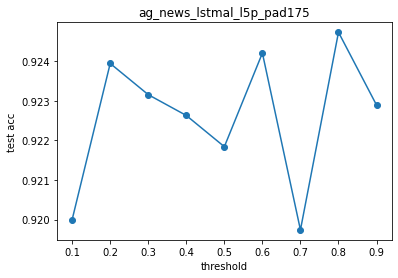

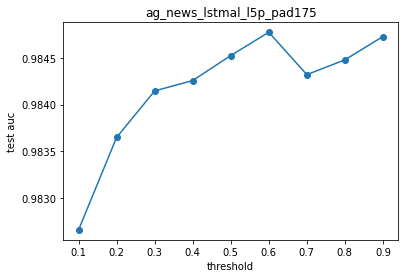

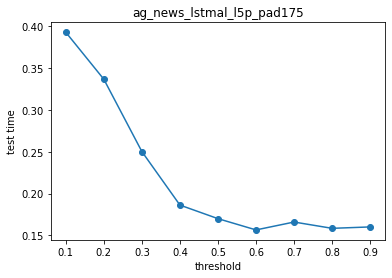

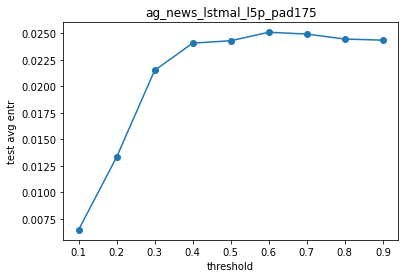

    padding_size  threshold     model  train_mask  test_acc  test_auc  \
0            175        0.1  linearal           1  0.923421  0.984769   
1            175        0.1  linearal           2  0.925000  0.984899   
2            175        0.1  linearal           3  0.922368  0.984848   
3            175        0.1  linearal           4  0.921842  0.984538   
4            175        0.1  linearal           5  0.924211  0.984458   
5            175        0.2  linearal           1  0.923684  0.984898   
6            175        0.2  linearal           2  0.923421  0.985128   
7            175        0.2  linearal           3  0.922368  0.984941   
8            175        0.2  linearal           4  0.924737  0.984673   
9            175        0.2  linearal           5  0.922368  0.984340   
10           175        0.3  linearal           1  0.923421  0.984762   
11           175        0.3  linearal           2  0.924474  0.985021   
12           175        0.3  linearal           3  

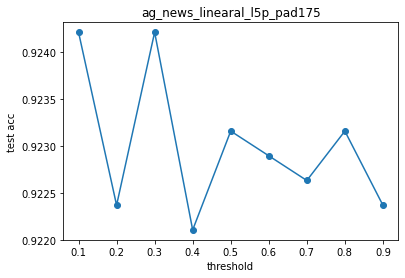

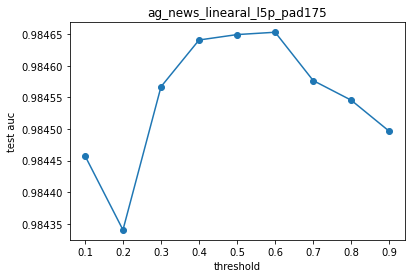

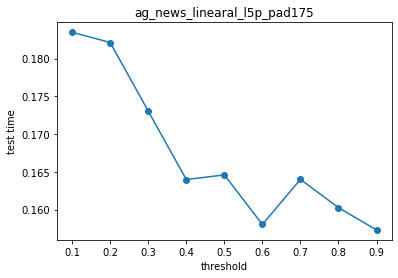

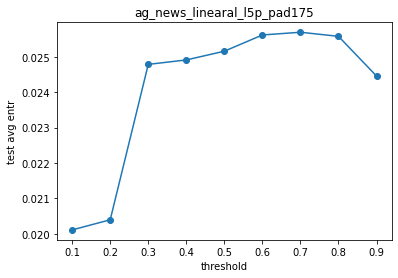

    padding_size  threshold          model  train_mask  test_acc  test_auc  \
0            175        0.1  transformeral           1  0.923158  0.985136   
1            175        0.1  transformeral           2  0.927105  0.983411   
2            175        0.1  transformeral           3  0.922895  0.982966   
3            175        0.1  transformeral           4  0.926053  0.982017   
4            175        0.1  transformeral           5  0.924737  0.982087   
5            175        0.2  transformeral           1  0.923947  0.984929   
6            175        0.2  transformeral           2  0.926053  0.984444   
7            175        0.2  transformeral           3  0.920526  0.983510   
8            175        0.2  transformeral           4  0.922368  0.982976   
9            175        0.2  transformeral           5  0.922368  0.982469   
10           175        0.3  transformeral           1  0.923421  0.984830   
11           175        0.3  transformeral           2  0.926053

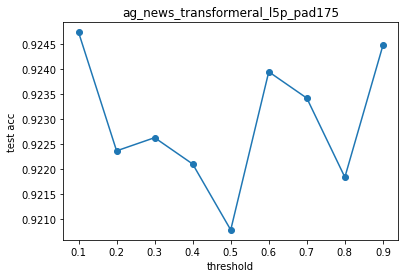

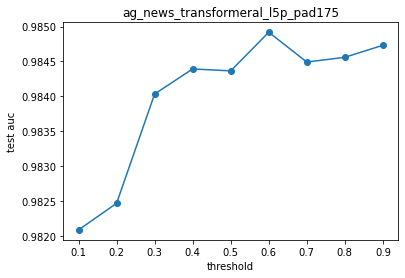

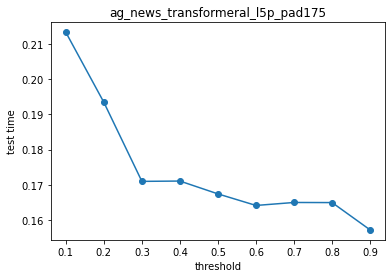

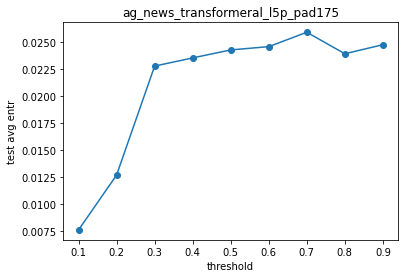

In [26]:
data = "ag_news"
for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=[])
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
        for text_len in [175]:
            layer = 5
            epoch = 10
            lr = 0.0001
            
            result = pd.DataFrame(columns=["padding_size"])
            result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
            result_ep["epoch"] = [*range(50)]
            list_acc = []
            list_auc = []
            list_entr = []
            list_test_time = []
            list_init_time = []
            list_train_time = []
            
            for mask in range(1,1+layer):
                save_path = f"ckpt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"  
                load_path = f"ckpt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask-1}/" 
                #out_path = f"result/0220/ag_news/fix adapt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"
                out_path = f"result/0214/prefix adapt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"
                log = f"{out_path}/{data}_{model}_l{layer}.log"
                
                with open(log,mode='r') as log:
                    buffer = log.readlines()
                    df = pd.DataFrame(buffer,columns=["log"])
                    df
                    
                    
                    for line in buffer:
                        match = re.match('Test threshold(.)*', line)
                        if match!=None:
                            match = re.findall("\d?\.\d+",match.group(0))
                            list_acc.append(float(match[1]))
                            list_auc.append(float(match[2]))
                            list_entr.append(float(match[3]))

                        match = re.match('t(.)*_test_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_test_time.append(float(match[1]))
                        match = re.match('init_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_init_time.append(float(match[0]))
                        match = re.match('(.)*valid_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_train_time.append(float(match[0]))
                                
            result['threshold'] = [threshold]*5
            result['model'] = [model]*5
            result['padding_size'] = [text_len]*5
            result["train_mask"] = [(1+i) for i in range(5)]
            
            result["test_acc"] = list_acc
            result["test_auc"] = list_auc
            result["test_avg_entr"] = list_entr
            
            result["init_time"] = list_init_time
            result["test_time"] = list_test_time
            result["train+valid_time"] = list_train_time
        
            #print(result)
            total_result = pd.concat([total_result,result],axis=0,ignore_index=True)
    
    table = total_result[total_result["train_mask"]==5]
    #title = f"{data}_{model}_l{layer}f_pad{text_len}"
    title = f"{data}_{model}_l{layer}p_pad{text_len}"
    path = f"result/_csv/{data}"
                   
    print(total_result)
    total_result.to_csv(f"{path}/{title}.csv", index=False)
    
    plt.title(title)
    plt.plot(t,table["test_acc"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test acc")
    plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_auc"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test auc")
    plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_time"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test time")
    plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_avg_entr"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test avg entr")
    plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    #break
            

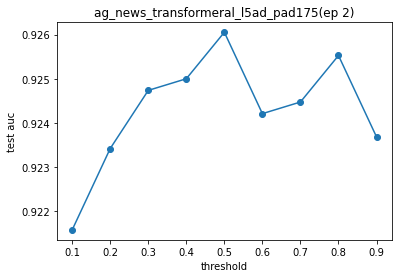

In [19]:
table = total_result[total_result["train_mask"]==5]
plt.title(title)
plt.plot(t,table["test_acc"],"o-") 
plt.xlabel("threshold")
plt.ylabel("test auc")
 
#plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
plt.show()

In [23]:
table

,padding_size,threshold,model,train_mask,test_acc,test_auc,test_avg_entr,init_time,test_time,train+valid_time
4,175,0.1,transformeral,5,0.923947,0.981911,0.022837,19.807489,0.244766,491.269116
9,175,0.2,transformeral,5,0.924211,0.983779,0.032451,20.718649,0.227599,490.657411
14,175,0.3,transformeral,5,0.926842,0.984314,0.044668,24.295931,0.216091,491.814984
19,175,0.4,transformeral,5,0.923947,0.984488,0.058152,22.584311,0.183418,491.278612
24,175,0.5,transformeral,5,0.925263,0.984757,0.048308,19.668415,0.166326,491.421161
29,175,0.6,transformeral,5,0.923421,0.984978,0.053719,19.393575,0.158180,491.125274
34,175,0.7,transformeral,5,0.922895,0.984890,0.049226,19.373295,0.160076,492.014192
39,175,0.8,transformeral,5,0.924211,0.985014,0.053787,19.635088,0.163463,492.685896
44,175,0.9,transformeral,5,0.923421,0.984887,0.048210,19.322409,0.157956,491.472826
